# Table of Contents
### 1. Import Libraries & Load Dataset
### 2. Data Cleaning & Standardization
### 3. Elbow Technique
### 4. K-means Clustering
### 5. Descriptive Statistics
### 6. Usefulness For Future Steps

## 1. Import Libraries & Load Dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [4]:
# Load Data
file_path = '/Users/asadagha/Documents/CF Data Analytics/Data Analytics Immersion/Achievement 6/Ex 6.1/Cleaned_Heart_Health_Data.csv'
data = pd.read_csv(file_path)

## 2. Data Cleaning & Standardization

In [6]:
# Keep only numerical columns
numerical_data = data.select_dtypes(include=[np.number])

In [7]:
# Remove rows with missing values
numerical_data = numerical_data.dropna()

In [8]:
numerical_data.head()

,PhysicalHealth,MentalHealth,SleepHours,HeightInMeters,WeightInKilograms,BMI
0,4.0,0.0,9.0,1.60,71.67,27.99
1,0.0,0.0,6.0,1.78,95.25,30.13
2,0.0,0.0,8.0,1.85,108.86,31.66
3,5.0,0.0,9.0,1.70,90.72,31.32
4,3.0,15.0,5.0,1.55,79.38,33.07


In [9]:
# Step 2: Standardize the Data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

## 3. Elbow Technique

In [11]:
# Use the Elbow Technique to Find Optimal k
num_cl = range(1, 11) 
kmeans = [KMeans(n_clusters=i, random_state=42) for i in num_cl]

In [12]:
# Calculate the K-Means score
score = [kmeans[i].fit(scaled_data).score(scaled_data) for i in range(len(kmeans))]  # Creates a score that represents a rate of variation for the given cluster option.
score

[-1476078.0000000023,
 -1174889.4802557158,
 -976130.8533404818,
 -857329.3744500073,
 -757657.85960863,
 -702131.2719537269,
 -661013.4922867129,
 -618733.2440465521,
 -581312.8939001502,
 -554508.6372151813]

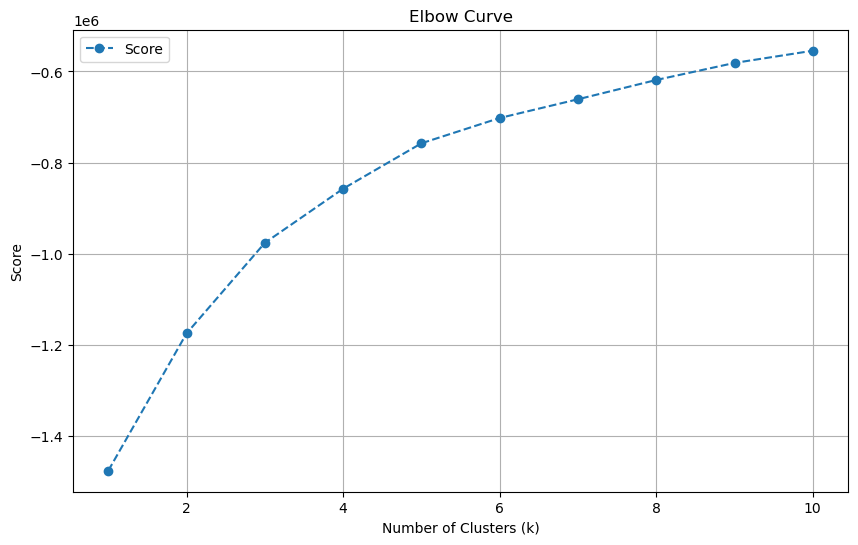

In [13]:
# Plot the elbow curve using Matplotlib
plt.figure(figsize=(10, 6))
plt.plot(num_cl, score, marker='o', linestyle='--', label='Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.legend()
plt.grid(True)
plt.show()

Based on the elbow curve, I would use 4 clusters. This is because this provides significant improvement over 2 or 3 clusters, but further increasing clusters beyond 4 would yield minimal additional gains while adding complexity.

## 4. K-means Clustering

In [16]:
# Perform K-Means Clustering with 4 clusters
optimal_k = 4  # Based on elbow curve analysis
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans_final.fit_predict(scaled_data)

In [17]:
# Add cluster assignments to the cleaned numerical DataFrame
numerical_data['Cluster'] = clusters

In [18]:
numerical_data.head()

,PhysicalHealth,MentalHealth,SleepHours,HeightInMeters,WeightInKilograms,BMI,Cluster
0,4.0,0.0,9.0,1.60,71.67,27.99,0
1,0.0,0.0,6.0,1.78,95.25,30.13,3
2,0.0,0.0,8.0,1.85,108.86,31.66,3
3,5.0,0.0,9.0,1.70,90.72,31.32,3
4,3.0,15.0,5.0,1.55,79.38,33.07,0


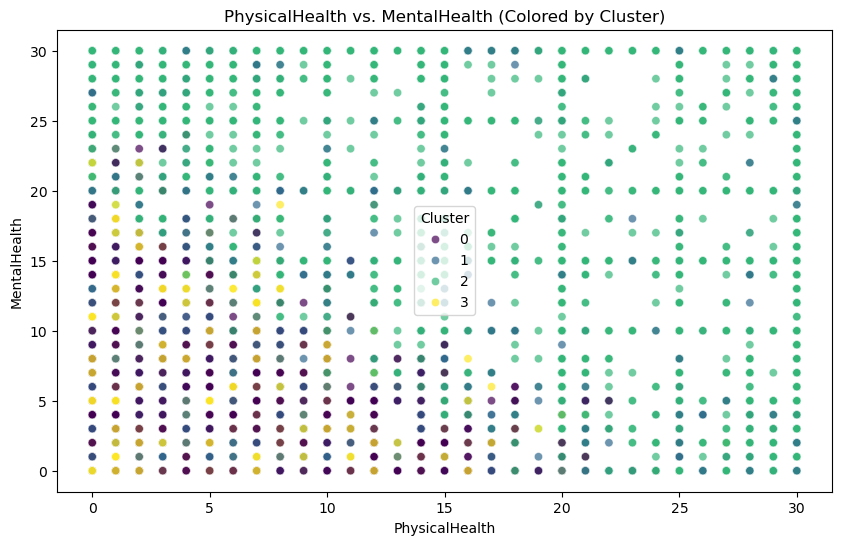

In [19]:
# Scatterplot: PhysicalHealth vs. MentalHealth
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=numerical_data,
    x="PhysicalHealth",
    y="MentalHealth",
    hue="Cluster",
    palette="viridis",
    alpha=0.7
)
plt.title("PhysicalHealth vs. MentalHealth (Colored by Cluster)")
plt.xlabel("PhysicalHealth")
plt.ylabel("MentalHealth")
plt.legend(title="Cluster")
plt.show()

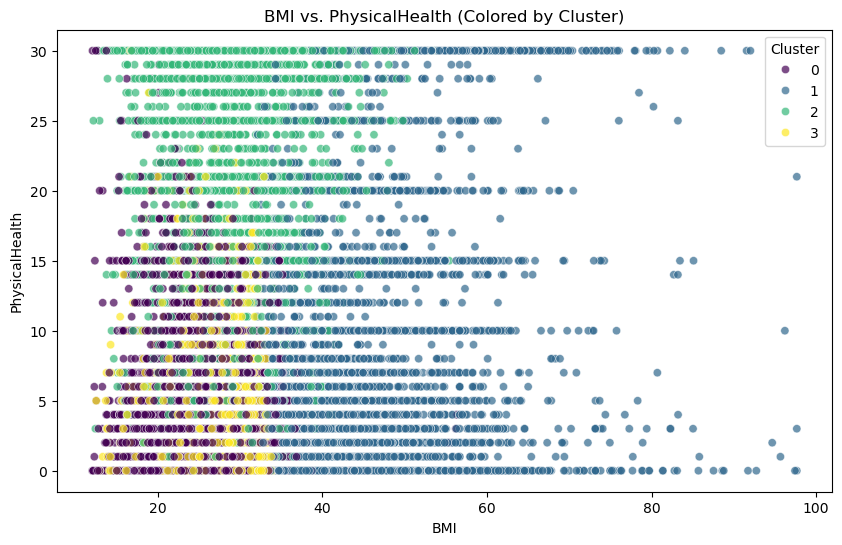

In [20]:
# Scatterplot: BMI vs. PhysicalHealth
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=numerical_data,
    x="BMI",
    y="PhysicalHealth",
    hue="Cluster",
    palette="viridis",
    alpha=0.7
)
plt.title("BMI vs. PhysicalHealth (Colored by Cluster)")
plt.xlabel("BMI")
plt.ylabel("PhysicalHealth")
plt.legend(title="Cluster")
plt.show()

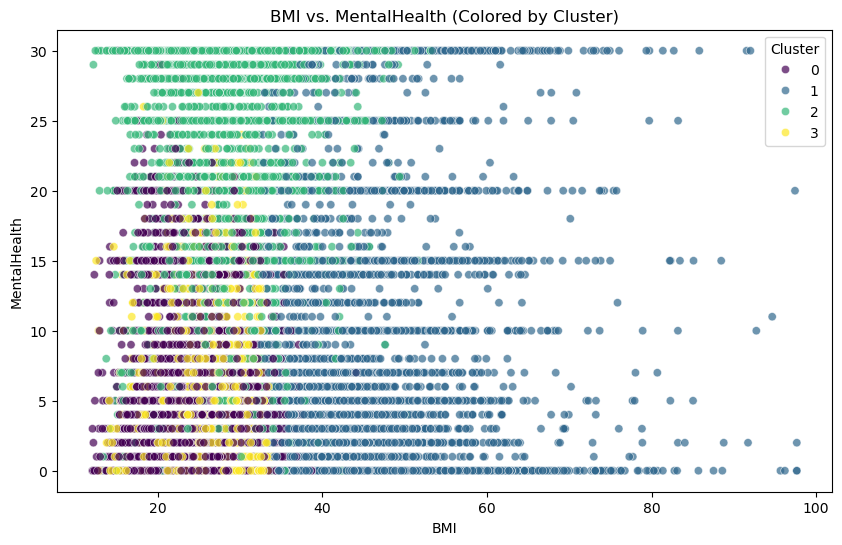

In [21]:
# Scatterplot: BMI vs. MentalHealth
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=numerical_data,
    x="BMI",
    y="MentalHealth",
    hue="Cluster",
    palette="viridis",
    alpha=0.7
)
plt.title("BMI vs. MentalHealth (Colored by Cluster)")
plt.xlabel("BMI")
plt.ylabel("MentalHealth")
plt.legend(title="Cluster")
plt.show()

The points in the clusters are highly intermingled, lacking clear boundaries or gaps that distinguish them from one another. This overlap indicates that the clusters do not represent unique groupings based on the current variables, and that the current clustering approach may not effectively identify meaningful subgroups.

## 5. Descriptive Statistics

In [24]:
# Calculate descriptive statistics for each cluster
cluster_stats = numerical_data.groupby('Cluster').describe()

In [25]:
# Display all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print the DataFrame
print(cluster_stats)

        PhysicalHealth                                                    \
                 count       mean        std  min  25%   50%   75%   max   
Cluster                                                                    
0              94793.0   1.476375   3.344049  0.0  0.0   0.0   1.0  30.0   
1              35656.0   4.178680   7.776103  0.0  0.0   0.0   5.0  30.0   
2              32893.0  18.907792  12.170726  0.0  5.0  25.0  30.0  30.0   
3              82671.0   1.239395   3.017647  0.0  0.0   0.0   1.0  30.0   

        MentalHealth                                                    \
               count       mean        std  min  25%   50%   75%   max   
Cluster                                                                  
0            94793.0   1.975420   3.998070  0.0  0.0   0.0   2.0  30.0   
1            35656.0   4.113165   7.327349  0.0  0.0   0.0   5.0  30.0   
2            32893.0  17.341592  12.330579  0.0  3.0  20.0  30.0  30.0   
3            82671.0   

Cluster 0: This group experiences very few poor health days, with an average of 1.48 days for poor physical health and 1.98 days for poor mental health. They have a near-normal BMI of 25.65, get adequate sleep at 7.18 hours, and tend to be slightly shorter (1.63 m) with lower weight (67.63 kg).

Cluster 1: People in this cluster face moderate health challenges, averaging 4.18 days of poor physical health and 4.11 days of poor mental health. They are slightly taller at 1.72 m but significantly heavier at 117.65 kg, resulting in a very high BMI of 39.83, and they tend to sleep slightly less, averaging 6.86 hours.

Cluster 2: This cluster deals with the most severe health issues, averaging 18.91 days of poor physical health and 17.34 days of poor mental health. While their BMI of 28.47 is overweight, their height (1.69 m) and weight (81.04 kg) are less extreme compared to Cluster 1, but they sleep the least, at just 6.61 hours per night.

Cluster 3: This group reports excellent health overall, with just 1.24 days of poor physical health and 1.46 days of poor mental health. They are the tallest group, averaging 1.80 m, and while they weigh more at 88.29 kg, their BMI of 27.40 suggests their weight is proportionate. They also get good sleep, averaging 7.08 hours a night.

## 6. Usefulness For Future Steps

Seeing that clusters lack clear, distinct boundaries or that important health factors are not fully explained by the existing variables suggests that we might need additional data. Future steps could involve incorporating demographic information, chronic health conditions, or lifestyle factors which could refine clustering, potentially producing more meaningful health profiles.

In [29]:
# ### 7. Exporting the Clustered Dataset

# Define the output path for the CSV file
output_path = '/Users/asadagha/Documents/CF Data Analytics/Data Analytics Immersion/Achievement 6/Ex 6.5/clustered_data_ex6_5.csv'

# Export the DataFrame to CSV without the index
numerical_data.to_csv(output_path, index=False)

print(f"Clustered dataset successfully exported to {output_path}")

Clustered dataset successfully exported to /Users/asadagha/Documents/CF Data Analytics/Data Analytics Immersion/Achievement 6/Ex 6.5/clustered_data_ex6_5.csv
